# Sistemas Inteligentes

## Laboratório 3 - Redução de Dimensionalidade e Regressão

Algoritmos de Redução de dimensionalidade:
- Principal Component Analysis (PCA)
- Independent Component Analysis (ICA)
- Isometric Mapping (Isomap)
- T-Distributed Stochastic Neighbor Embedding (TSNE)

Modelos de regressão linear:
- Least Squares
- Ridge
- Lasso
- Lasso Least-angle regression (LARS)
- RANdom SAmple Consensus (RANSAC)
- Theil-Sen

### Identificação do Aluno

#### Nome Completo

Dimitri Leandro de Oliveira Silva

## Importação e preparação dos dados

In [1]:
from sklearn.datasets import load_diabetes

dataset = load_diabetes()
x = dataset.data
y = dataset.target

In [2]:
x.shape

(442, 10)

In [3]:
y.shape

(442,)

## Redução de Dimensionalidade

In [4]:
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap, TSNE

n = 1

xPCA = PCA(n_components=n).fit_transform(x)
xICA = FastICA(n_components=n).fit_transform(x)
xISO = Isomap(n_components=n).fit_transform(x)
xTSNE = TSNE(n_components=n).fit_transform(x)

In [5]:
xPCA.shape

(442, 1)

In [6]:
xICA.shape

(442, 1)

In [7]:
xISO.shape

(442, 1)

In [8]:
xTSNE.shape

(442, 1)

### Caso mais simples

In [9]:
from sklearn.model_selection import train_test_split as tts

xTrainPCA, xTestPCA, yTrainPCA, yTestPCA = tts(xPCA, y, test_size=0.2)

In [10]:
from sklearn.linear_model import LinearRegression

linearRegressionPCA = LinearRegression().fit(xTrainPCA, yTrainPCA)

yPredLinearRegressionPCA = linearRegressionPCA.predict(xTestPCA)

In [11]:
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

print("MSE \t %.2f" % mse(yTestPCA, yPredLinearRegressionPCA))
print("R2 \t %.2f" % r2(yTestPCA, yPredLinearRegressionPCA))

MSE 	 3716.98
R2 	 0.30


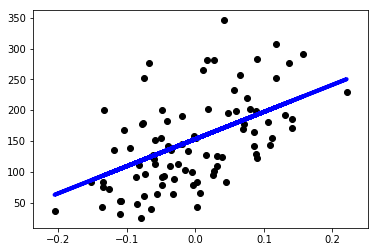

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(xTestPCA, yTestPCA, color='black')
plt.plot(xTestPCA, yPredLinearRegressionPCA, color='blue', linewidth=4)

### Comparando Métodos de Redução de Dimensionalidade

In [13]:
# Aqui eu estou definindo a funcao que vai criar um regressor linear após receber os vetores 
# X(já com uma dimensão) e Y. Essa função retorna os vetores vetorMSE e vetorR2, cada um com os valores
# obtidos em cada uma das iterações para o coeficiente de determinação e o erro quadrático médio, respectivamente.

def regressaoLinear(x, y, qtdIteracoes=10000, tamanhoTeste=0.2):
    
    vetorMSE = []
    vetorR2 = []
    objLR = LinearRegression()
    
    for iteracao in range(0, qtdIteracoes):
        xTrain, xTest, yTrain, yTest = tts(x, y, test_size=tamanhoTeste)
        objLR.fit(xTrain, yTrain)
        yPred = objLR.predict(xTest)
        vetorMSE.append(mse(yTest, yPred))
        vetorR2.append(r2(yTest, yPred))
    
    return vetorMSE, vetorR2

In [14]:
# Aqui é só uma função pra printar o mínimo, máxima, desvio padrão e média dos vetores vetorMSE e vetorR2.

from numpy import average, amin, amax, std, histogram

def printar(nome, vetorMSE, vetorR2, qtdBins=100, corA='Blue', corB='Green'):
    print("\nUTILIZANDO", nome, "COMO MÉTODO DE REDUÇÃO DE DIMENSIONALIDADE")
    
    print("\n")    
    plt.hist(vetorMSE, bins=qtdBins, color=corA)
    plt.title("ERRO QUADRÁTICO MÉDIO")
    plt.xlabel("Valores")
    plt.ylabel("Frequencia")
    plt.show()    
    print("Mínimo \t %.2f" % amin(vetorMSE))
    print("Média \t %.2f" % average(vetorMSE))
    print("Máximo \t %.2f" % amax(vetorMSE))
    print("DP \t %.2f" % std(vetorMSE))
    
    print("\n")
    plt.hist(vetorR2, bins=qtdBins, color=corB)
    plt.title("COEFICIENTE DE DETERMINAÇÃO")
    plt.xlabel("Valores")
    plt.ylabel("Frequencia")
    plt.show()  
    print("Mínimo \t %.2f" % amin(vetorR2))
    print("Média \t %.2f" % average(vetorR2))
    print("Máximo \t %.2f" % amax(vetorR2))
    print("DP \t %.2f" % std(vetorR2))   

#### PCA


UTILIZANDO PCA COMO MÉTODO DE REDUÇÃO DE DIMENSIONALIDADE




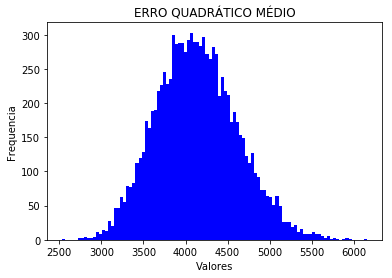

Mínimo 	 2537.11
Média 	 4133.81
Máximo 	 6153.74
DP 	 481.60




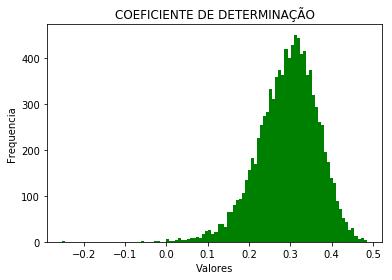

Mínimo 	 -0.25
Média 	 0.29
Máximo 	 0.48
DP 	 0.07


In [15]:
vetorMSE, vetorR2 = regressaoLinear(xPCA, y) #regressaoLinear(x, y, qtdIteracoes, tamanhoTeste)
printar("PCA", vetorMSE, vetorR2) #printar(nome, vetorMSE, vetorR2, qtdBins, corA, corB)

#### ICA


UTILIZANDO ICA COMO MÉTODO DE REDUÇÃO DE DIMENSIONALIDADE




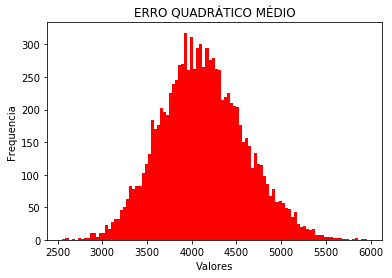

Mínimo 	 2554.61
Média 	 4124.14
Máximo 	 5957.78
DP 	 473.26




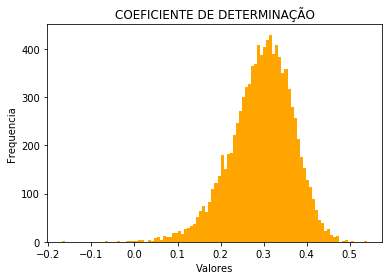

Mínimo 	 -0.17
Média 	 0.29
Máximo 	 0.54
DP 	 0.07


In [16]:
vetorMSE, vetorR2 = regressaoLinear(xICA, y) #regressaoLinear(x, y, qtdIteracoes, tamanhoTeste)
printar("ICA", vetorMSE, vetorR2, corA='Red', corB='Orange') #printar(nome, vetorMSE, vetorR2, qtdBins, corA, corB)

#### Isomap


UTILIZANDO ISOMAP COMO MÉTODO DE REDUÇÃO DE DIMENSIONALIDADE




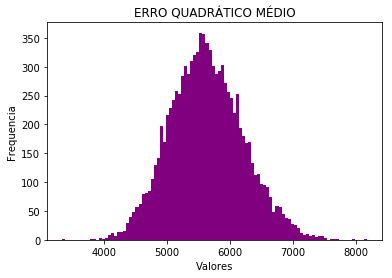

Mínimo 	 3333.63
Média 	 5624.93
Máximo 	 8172.42
DP 	 581.85




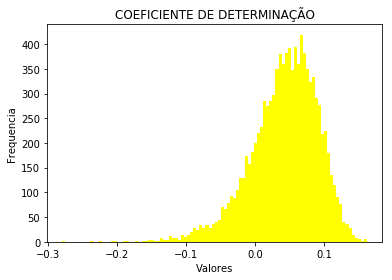

Mínimo 	 -0.28
Média 	 0.04
Máximo 	 0.16
DP 	 0.05


In [17]:
vetorMSE, vetorR2 = regressaoLinear(xISO, y) #regressaoLinear(x, y, qtdIteracoes, tamanhoTeste)
printar("ISOMAP", vetorMSE, vetorR2, corA='Purple', corB='Yellow') #printar(nome, vetorMSE, vetorR2, qtdBins, corA, corB)

#### TSNE


UTILIZANDO TSNE COMO MÉTODO DE REDUÇÃO DE DIMENSIONALIDADE




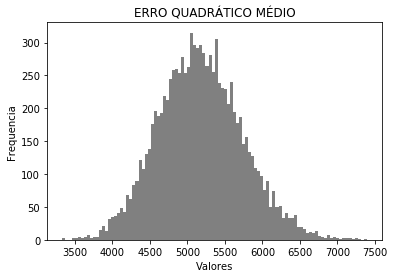

Mínimo 	 3332.44
Média 	 5173.58
Máximo 	 7391.71
DP 	 559.43




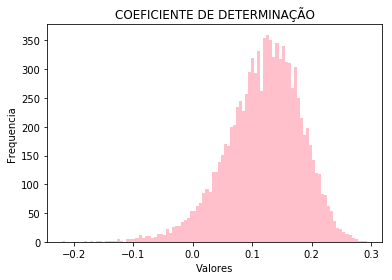

Mínimo 	 -0.22
Média 	 0.12
Máximo 	 0.29
DP 	 0.06


In [18]:
vetorMSE, vetorR2 = regressaoLinear(xTSNE, y) #regressaoLinear(x, y, qtdIteracoes, tamanhoTeste)
printar("TSNE", vetorMSE, vetorR2, corA='Grey', corB='Pink') #printar(nome, vetorMSE, vetorR2, qtdBins, corA, corB)

### Comparando modelos de Regressão

In [19]:
# Definindo uma função que recebe um modelo de regressão, separa os dados de treinamento
# e teste, treina o regressor e plota o gráfico

def plotar(x, y, objRegressor, titulo, cor):
    #separando os dados de treino e teste
    xTrain, xTest, yTrain, yTest = tts(x, y, test_size=0.2)
    
    #treinando o regressor
    objRegressor.fit(xTrain, yTrain)
    
    #predizendo os dados de teste
    yPred = objRegressor.predict(xTest)
    
    #plotando a dispersão dos dados e a curva de regressao
    plt.scatter(xTest, yTest, color='black')
    plt.title(titulo)
    plt.plot(xTest, yPred, color=cor, linewidth=4)
    plt.show()
    
    #printando MSE e R2
    print("MSE \t %.2f" % mse(yTest, yPred))
    print("R2 \t %.2f\n\n\n" % r2(yTest, yPred))

Referências para os códigos:

http://scikit-learn.org/stable/modules/linear_model.html

http://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html#sphx-glr-auto-examples-linear-model-plot-ransac-py

http://scikit-learn.org/stable/auto_examples/linear_model/plot_theilsen.html#sphx-glr-auto-examples-linear-model-plot-theilsen-py

#### Least Squares

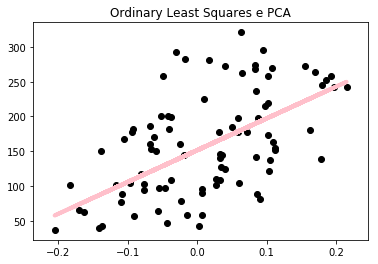

MSE 	 3822.87
R2 	 0.29





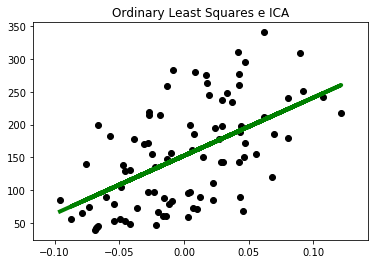

MSE 	 4103.75
R2 	 0.33





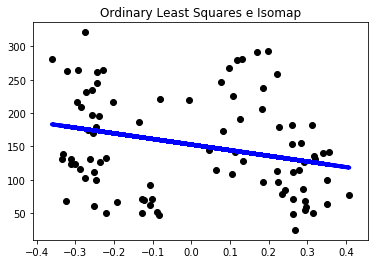

MSE 	 5317.61
R2 	 0.04





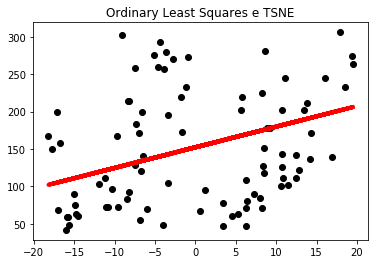

MSE 	 5471.20
R2 	 0.05





In [20]:
# Criando o regressor
objLS = LinearRegression()

# PCA
plotar(xPCA, y, objLS, 'Ordinary Least Squares e PCA', 'pink')

# ICA
plotar(xICA, y, objLS, 'Ordinary Least Squares e ICA', 'green')

# ISO
plotar(xISO, y, objLS, 'Ordinary Least Squares e Isomap', 'blue')

# TSNE
plotar(xTSNE, y, objLS, 'Ordinary Least Squares e TSNE', 'red')

#### Ridge

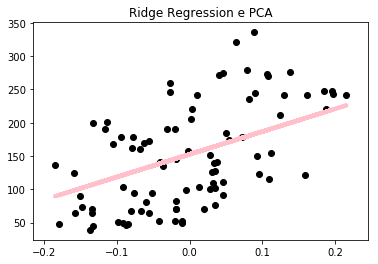

MSE 	 4055.62
R2 	 0.30





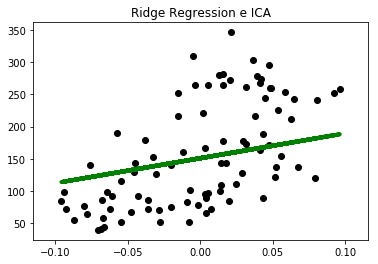

MSE 	 5126.26
R2 	 0.22





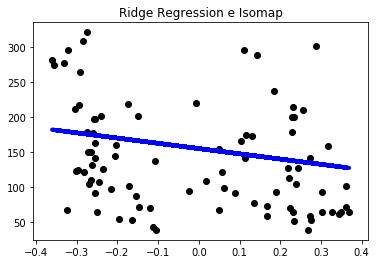

MSE 	 5234.07
R2 	 0.04





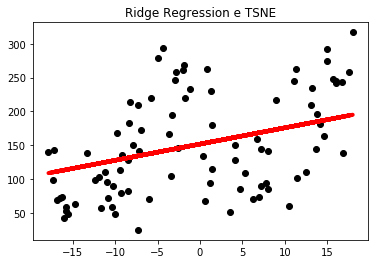

MSE 	 4411.03
R2 	 0.21





In [21]:
from sklearn.linear_model import Ridge

# Criando o regressor
objR = Ridge()

# PCA
plotar(xPCA, y, objR, 'Ridge Regression e PCA', 'pink')

# ICA
plotar(xICA, y, objR, 'Ridge Regression e ICA', 'green')

# ISO
plotar(xISO, y, objR, 'Ridge Regression e Isomap', 'blue')

# TSNE
plotar(xTSNE, y, objR, 'Ridge Regression e TSNE', 'red')

#### Lasso

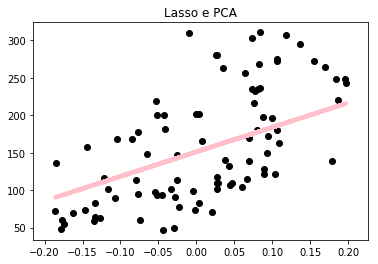

MSE 	 3728.20
R2 	 0.35





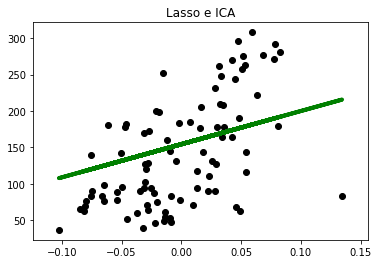

MSE 	 4252.39
R2 	 0.23





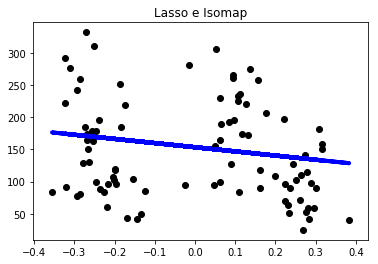

MSE 	 5430.96
R2 	 0.04





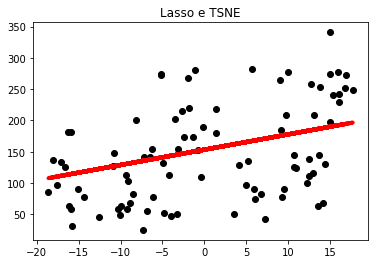

MSE 	 4925.80
R2 	 0.18





In [22]:
from sklearn.linear_model import Lasso

# Criando o regressor
objLasso = Lasso()

# PCA
plotar(xPCA, y, objLasso, 'Lasso e PCA', 'pink')

# ICA
plotar(xICA, y, objLasso, 'Lasso e ICA', 'green')

# ISO
plotar(xISO, y, objLasso, 'Lasso e Isomap', 'blue')

# TSNE
plotar(xTSNE, y, objLasso, 'Lasso e TSNE', 'red')

#### Lasso LARS

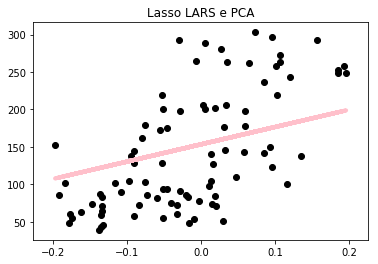

MSE 	 4401.23
R2 	 0.28





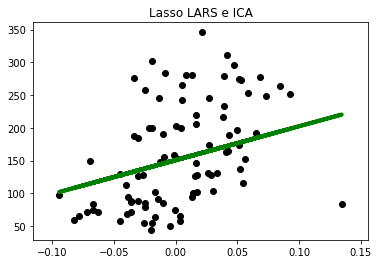

MSE 	 5136.94
R2 	 0.18





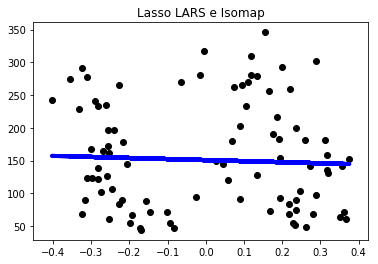

MSE 	 6729.94
R2 	 -0.00





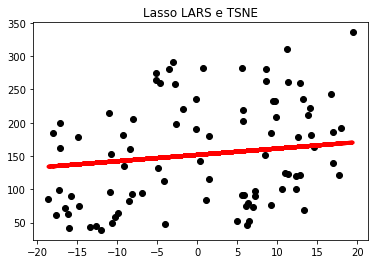

MSE 	 5722.42
R2 	 0.07





In [23]:
from sklearn.linear_model import LassoLars

# Criando o regressor
objLL = LassoLars()

# PCA
plotar(xPCA, y, objLL, 'Lasso LARS e PCA', 'pink')

# ICA
plotar(xICA, y, objLL, 'Lasso LARS e ICA', 'green')

# ISO
plotar(xISO, y, objLL, 'Lasso LARS e Isomap', 'blue')

# TSNE
plotar(xTSNE, y, objLL, 'Lasso LARS e TSNE', 'red')

#### Bayesian Ridge

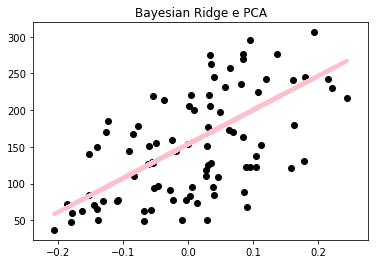

MSE 	 3424.70
R2 	 0.30





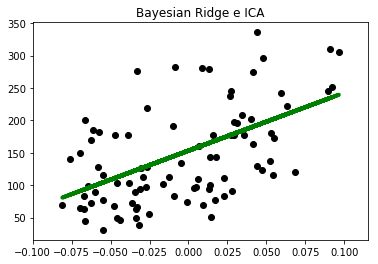

MSE 	 3952.11
R2 	 0.28





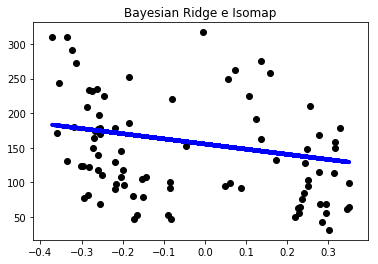

MSE 	 4841.77
R2 	 0.06





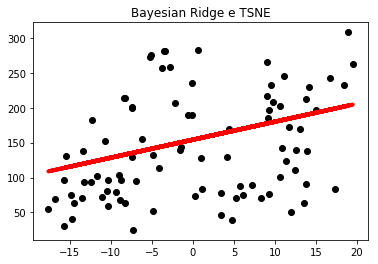

MSE 	 5024.99
R2 	 0.09





In [24]:
from sklearn.linear_model import BayesianRidge

# Criando o regressor
objBR = BayesianRidge()

# PCA
plotar(xPCA, y, objBR, 'Bayesian Ridge e PCA', 'pink')

# ICA
plotar(xICA, y, objBR, 'Bayesian Ridge e ICA', 'green')

# ISO
plotar(xISO, y, objBR, 'Bayesian Ridge e Isomap', 'blue')

# TSNE
plotar(xTSNE, y, objBR, 'Bayesian Ridge e TSNE', 'red')

#### RANSAC

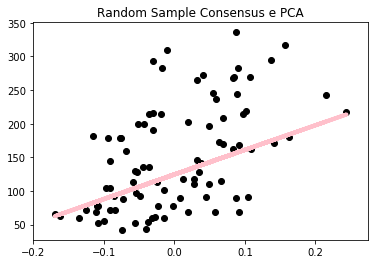

MSE 	 5090.50
R2 	 0.15





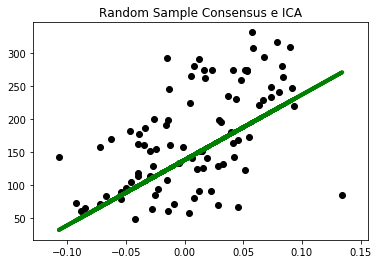

MSE 	 4928.85
R2 	 0.18





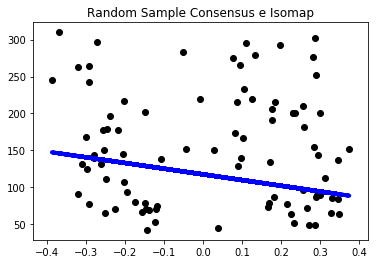

MSE 	 7192.18
R2 	 -0.25





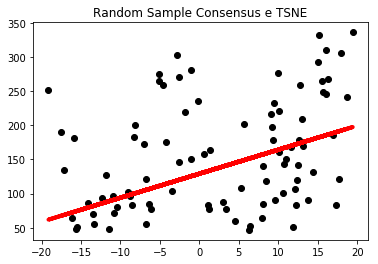

MSE 	 6115.58
R2 	 0.04





In [25]:
from sklearn.linear_model import RANSACRegressor

# Criando o regressor
objRANSAC = RANSACRegressor()

# PCA
plotar(xPCA, y, objRANSAC, 'Random Sample Consensus e PCA', 'pink')

# ICA
plotar(xICA, y, objRANSAC, 'Random Sample Consensus e ICA', 'green')

# ISO
plotar(xISO, y, objRANSAC, 'Random Sample Consensus e Isomap', 'blue')

# TSNE
plotar(xTSNE, y, objRANSAC, 'Random Sample Consensus e TSNE', 'red')

#### Theil-Sen

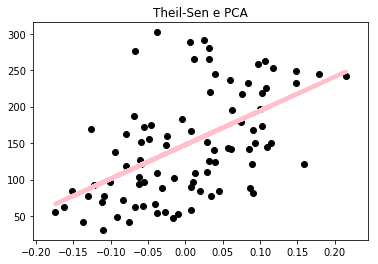

MSE 	 3802.40
R2 	 0.27





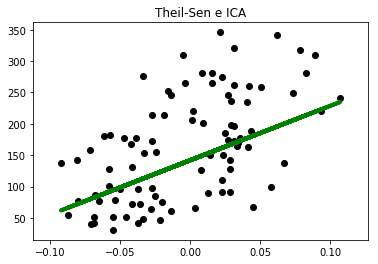

MSE 	 5395.48
R2 	 0.23





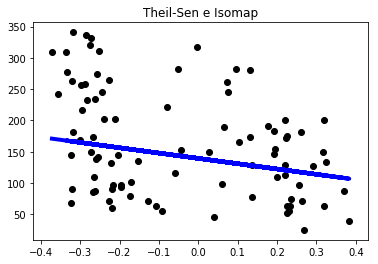

MSE 	 6600.92
R2 	 0.07





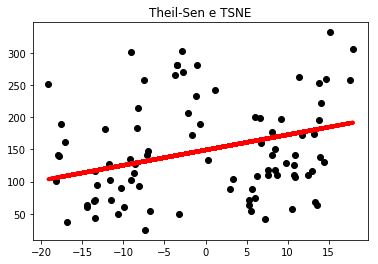

MSE 	 5695.82
R2 	 0.02





In [26]:
from sklearn.linear_model import TheilSenRegressor

# Criando o regressor
objTS = TheilSenRegressor()

# PCA
plotar(xPCA, y, objTS, 'Theil-Sen e PCA', 'pink')

# ICA
plotar(xICA, y, objTS, 'Theil-Sen e ICA', 'green')

# ISO
plotar(xISO, y, objTS, 'Theil-Sen e Isomap', 'blue')

# TSNE
plotar(xTSNE, y, objTS, 'Theil-Sen e TSNE', 'red')

### Gráfico geral comparativo

In [27]:
# Definindo a função que plota todos os modelos de regressão juntos usando um 
# determinado x gerado a partir de um método de redução de dimensionalidade

def plotarTudoJunto(x, y, titulo):
    #separando os dados de treino e teste
    xTrain, xTest, yTrain, yTest = tts(x, y, test_size=0.2)
    
    #treinando os regressores
    objLS      =  LinearRegression().fit(xTrain, yTrain)
    objR       =  Ridge().fit(xTrain, yTrain)
    objLasso   =  Lasso().fit(xTrain, yTrain)
    objLL      =  LassoLars().fit(xTrain, yTrain)
    objBR      =  BayesianRidge().fit(xTrain, yTrain)
    objRANSAC  =  RANSACRegressor().fit(xTrain, yTrain)
    objTS      =  TheilSenRegressor().fit(xTrain, yTrain)

    
    #predizendo os dados de teste
    yPredLS     = objLS.predict(xTest)
    yPredR      = objR.predict(xTest)
    yPredLasso  = objLasso.predict(xTest)
    yPredLL     = objLL.predict(xTest)
    yPredBR     = objBR.predict(xTest)
    yPredRANSAC = objRANSAC.predict(xTest)
    yPredTS     = objTS.predict(xTest)
    
    #plotando a dispersão dos dados e a curva de regressao
    plt.scatter(xTest, yTest, color='black', s=3)
    plt.plot(xTest, yPredLS, color='red', linewidth=2, label='Linear Regression')
    plt.plot(xTest, yPredR, color='orange', linewidth=2, label='Ridge')
    plt.plot(xTest, yPredLasso, color='yellow', linewidth=2, label='Lasso')
    plt.plot(xTest, yPredLL, color='green', linewidth=2, label='Lasso LARS')
    plt.plot(xTest, yPredBR, color='blue', linewidth=2, label='Bayesian Ridge')
    plt.plot(xTest, yPredRANSAC, color='purple', linewidth=2, label='RANSAC')
    plt.plot(xTest, yPredTS, color='gray', linewidth=2, label='Theil-Sen')
    plt.legend()
    plt.title('Dispersão dos dados usando ' + titulo)
    plt.show()
    print("\n\n\n")

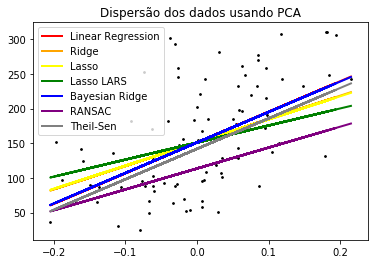

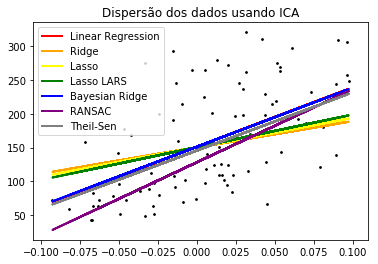

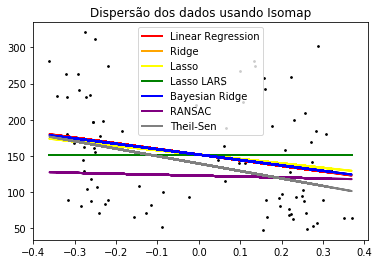

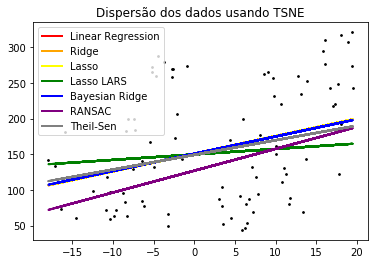

In [28]:
# Plotando

plotarTudoJunto(xPCA, y, 'PCA')
plotarTudoJunto(xICA, y, 'ICA')
plotarTudoJunto(xISO, y, 'Isomap')
plotarTudoJunto(xTSNE, y, 'TSNE')